# Importing all the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit

# Importing the dataset and data exploration

In [2]:
df = pd.read_csv('C:\\Users\\Asus\\OneDrive\\Desktop\\Spiced_Academy\\naive-zatar-student-codes\\week2\\Data\\train.csv', index_col= 0)

In [3]:
# checking the few rows of the dataframe
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# checking the datatype of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### there are missing values in Age, Cabin and Embarked.



#### Embarked

In [5]:
# filling missing values using mean,mode or median
emb = df['Embarked'].mode()[0] # gives us the most frequent value in col Embarked with indexing [0] 
emb

'S'

In [6]:
df['Embarked'].fillna(emb, inplace=True) # inplace true is important when you are not defining it to  a new variable

#### Age

In [7]:
df[df['Age'].isna()] # checking the rows of the missing val

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


<AxesSubplot:xlabel='Age', ylabel='Count'>

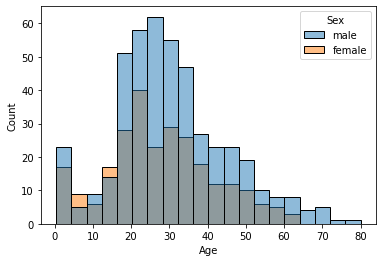

In [8]:
# Lets look at the age distribution of both Male and Female before imputing any new val to the missing rows for age
sns.histplot(x = df['Age'], hue = df['Sex'])

#### looking at the above age distribution the histigram is right skewed so instead of imputing mean, I would impute median in the missing rows for age

In [9]:
 # we use transform function to replce all the row alues with median
age = df.groupby(by = ['Sex'])['Age'].transform('median')
# when  we fill the missing values, it fills the nan with median val.
age

PassengerId
1      29.0
2      27.0
3      27.0
4      27.0
5      29.0
       ... 
887    29.0
888    27.0
889    27.0
890    29.0
891    29.0
Name: Age, Length: 891, dtype: float64

In [10]:
#updating the dataframe 
df['Age'].fillna(age, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


#### now we have filled in all the nan values and the only feature left with nan val is Cabin, which anyways  I will not conside in my model so I leave it the way it is.

In [12]:
# creating a new feature called family using #SibSp and Parch which is mothing but number of family members
df['Family'] = df['SibSp'] + df['Parch']

In [13]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


<AxesSubplot:xlabel='Pclass', ylabel='count'>

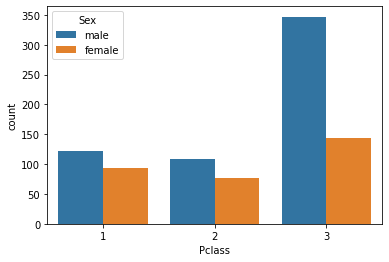

In [14]:
sns.countplot(x = df['Pclass'], hue = df['Sex'])

<AxesSubplot:xlabel='Embarked', ylabel='count'>

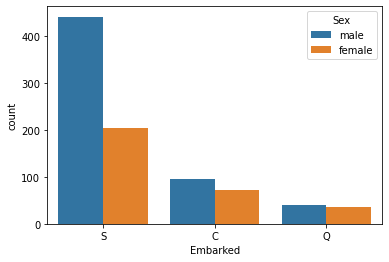

In [15]:
sns.countplot(x = df['Embarked'], hue=df['Sex'])

In [16]:
# since our model cannot take in string val, so we convert them into some machine readable format
#Let encode the catagorial column using One hot encoder
pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True).head(10)

,Embarked_Q,Embarked_S
PassengerId,,
1,0,1
2,0,0
3,0,1
4,0,1
5,0,1
6,1,0
7,0,1
8,0,1
9,0,1


In [17]:
df[['Q','S']] =pd.get_dummies(df['Embarked'],drop_first=True) 

In [18]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Q,S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [19]:
df[['Pclass_2','PClass_3']] =pd.get_dummies(df['Pclass'],drop_first=True) 

In [20]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Q,S,Pclass_2,PClass_3
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


In [21]:
df[['male']] =pd.get_dummies(df['Sex'],drop_first=True) 

In [22]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Q,S,Pclass_2,PClass_3,male
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,1,0,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1


In [23]:
df.drop(['Pclass', 'Name','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked'], axis = 1, inplace= True)

In [24]:
# Splitting dataframe into X and y
X = df.drop(['Survived'], axis=1)
y = df['Survived']
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25,random_state= 42)

In [26]:
X_train.shape

(668, 7)

In [27]:
X_test.shape

(223, 7)

In [28]:
# scaling the feature col Age and Family
def scale_data(col_name, data):
    scaler = MinMaxScaler()
    scaler.fit(data[[col_name]])
    data[col_name] = scaler.transform(data[col_name].values.reshape(-1,1))
    data.head()

In [29]:
scale_data('Age', X_train)

C:\Users\Asus\AppData\Local\Temp/ipykernel_28228/3898769316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_name] = scaler.transform(data[col_name].values.reshape(-1,1))


In [30]:
X_train.head()

,Age,Family,Q,S,Pclass_2,PClass_3,male
PassengerId,,,,,,,
299,0.359135,0,0,1,0,0,1
885,0.308872,0,0,1,0,1,1
248,0.296306,2,0,1,1,0,0
479,0.271174,0,0,1,0,1,1
306,0.006283,3,0,1,0,0,1


<AxesSubplot:xlabel='Family', ylabel='count'>

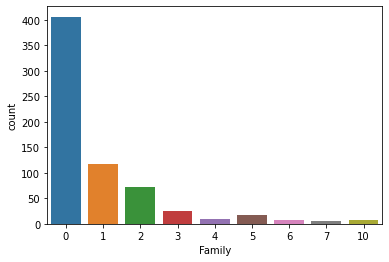

In [31]:
sns.countplot(x = X_train['Family'])

In [32]:
scale_data('Family', X_train)

C:\Users\Asus\AppData\Local\Temp/ipykernel_28228/3898769316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_name] = scaler.transform(data[col_name].values.reshape(-1,1))


In [33]:
X_train.head()

,Age,Family,Q,S,Pclass_2,PClass_3,male
PassengerId,,,,,,,
299,0.359135,0.0,0,1,0,0,1
885,0.308872,0.0,0,1,0,1,1
248,0.296306,0.2,0,1,1,0,0
479,0.271174,0.0,0,1,0,1,1
306,0.006283,0.3,0,1,0,0,1


# Building the Logistic Regression Model

In [34]:
lm1 = LogisticRegression(max_iter= 10000).fit(X_train, y_train)

In [35]:
print('train_score_1:',round(lm1.score(X_train, y_train)*100,2), '%')

train_score_1: 80.09 %


In [36]:
# coefficients
mod1_w1 = lm1.coef_
mod1_w0 =lm1.intercept_
print('mod1_w1 =',lm1.coef_)# two coefficient as there are two feature in the data for training
print('mod1_w0 =',lm1.intercept_)

mod1_w1 = [[-1.5974643  -1.07400555 -0.22788201 -0.59650429 -0.48684324 -1.769512
  -2.51378311]]
mod1_w0 = [3.23399461]


#### rescaling the test dataset

In [37]:
X_test.head()

,Age,Family,Q,S,Pclass_2,PClass_3,male
PassengerId,,,,,,,
710,29.0,2,0,0,0,1,1
440,31.0,0,0,1,1,0,1
841,20.0,0,0,1,0,1,1
721,6.0,1,0,1,1,0,0
40,14.0,1,0,0,0,1,0


In [38]:
scale_data('Age',X_test)

C:\Users\Asus\AppData\Local\Temp/ipykernel_28228/3898769316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_name] = scaler.transform(data[col_name].values.reshape(-1,1))


In [39]:
scale_data('Family',X_test)

C:\Users\Asus\AppData\Local\Temp/ipykernel_28228/3898769316.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col_name] = scaler.transform(data[col_name].values.reshape(-1,1))


In [40]:
X_test.head()

,Age,Family,Q,S,Pclass_2,PClass_3,male
PassengerId,,,,,,,
710,0.401454,0.333333,0,0,0,1,1
440,0.429956,0.000000,0,1,1,0,1
841,0.273194,0.000000,0,1,0,1,1
721,0.073678,0.166667,0,1,1,0,0
40,0.187687,0.166667,0,0,0,1,0


In [41]:
y_pred = lm1.predict(X_test)

In [42]:
print('test_score_1:',round(lm1.score(X_test, y_test)*100,2), '%')

test_score_1: 80.72 %


# Evaluation Metrics

In [43]:
# Accuracy Score
print('accuracy_score =',round(accuracy_score(y_test, y_pred),2)*100, '%')

accuracy_score = 81.0 %


In [44]:
# Precision Score
print('precision_score =', round(precision_score(y_test, y_pred),2)*100, '%')

precision_score = 79.0 %


In [45]:
# Recall
print('recall_score =', round(recall_score(y_test, y_pred),2)*100, '%')

recall_score = 71.0 %


In [46]:
#F1 Score
print('f1_score =', round(f1_score(y_test, y_pred),2)*100, '%')

f1_score = 75.0 %


# Confusion Matrix

In [47]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[117  17]
 [ 26  63]]


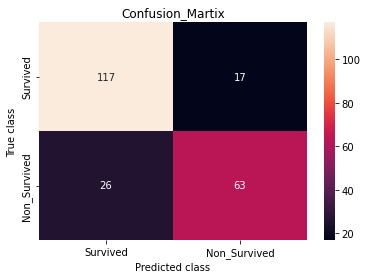

In [48]:
LABELS = ["Survived","Non_Survived"]
sns.heatmap(cf_matrix, annot=True, xticklabels=LABELS, yticklabels=LABELS,fmt = 'd')
plt.title("Confusion_Martix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

# ROC curve

ROC plot for Mod1


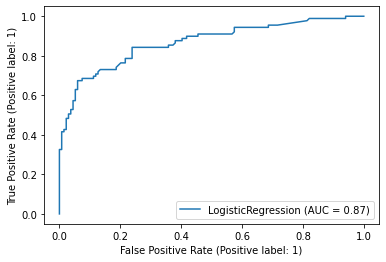

In [49]:
print('ROC plot for Mod1')
plot_roc_curve(lm1,X_test, y_test)

In [50]:
s = StratifiedShuffleSplit(n_splits=5,test_size=.20,random_state=1)

cross_validation_lr = cross_val_score(estimator=lm1, # the model to evaluate
                                     X=X_train,
                                     y=y_train,
                                     scoring='accuracy', # evaluation metrics
                                      cv=s, # cross validation splitting
                                     verbose=3) 

[CV] END ................................ score: (test=0.754) total time=   0.0s
[CV] END ................................ score: (test=0.858) total time=   0.0s
[CV] END ................................ score: (test=0.776) total time=   0.0s
[CV] END ................................ score: (test=0.799) total time=   0.0s
[CV] END ................................ score: (test=0.776) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [51]:
print(f'Validation accuracy scores: {np.round(cross_validation_lr,2)}')
print(f'\nmean: {cross_validation_lr.mean():.2}')
print(f'std: {cross_validation_lr.std():.1}')

Validation accuracy scores: [0.75 0.86 0.78 0.8  0.78]

mean: 0.79
std: 0.04


# __________________________________________________________________

# Random Forest Model()

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf1 = RandomForestClassifier(n_estimators= 1000,min_samples_split= 10, min_samples_leaf= 10 ).fit(X_train, y_train)

In [54]:
rf1.score(X_train, y_train)

0.842814371257485

In [55]:
print('train_score_rf_1:',round(rf1.score(X_train, y_train)*100,2), '%')

train_score_rf_1: 84.28 %


In [56]:
y_pred_rf1 = rf1.predict(X_test)

In [57]:

print('test_score_rf_1:',round(rf1.score(X_test, y_test)*100,2), '%')

test_score_rf_1: 82.06 %


In [58]:
# Accuracy Score
print('accuracy_score_rf1 =',round(accuracy_score(y_test, y_pred_rf1),2)*100, '%')

# Precision Score
print('precision_score_rf1 =', round(precision_score(y_test, y_pred_rf1),2)*100, '%')

# Recall
print('recall_score:rf1 =', round(recall_score(y_test, y_pred_rf1),2)*100, '%')

#F1 Score
print('f1_score_rf1 =', round(f1_score(y_test, y_pred_rf1),2)*100, '%')

accuracy_score_rf1 = 82.0 %
precision_score_rf1 = 86.0 %
recall_score:rf1 = 66.0 %
f1_score_rf1 = 75.0 %


In [59]:
cf_matrix_rf1 = confusion_matrix(y_test, y_pred_rf1)
print(cf_matrix_rf1)

[[124  10]
 [ 30  59]]


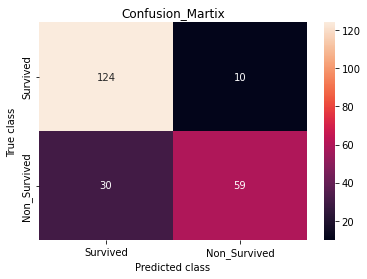

In [60]:
LABELS = ["Survived","Non_Survived"]
sns.heatmap(cf_matrix_rf1, annot=True, xticklabels=LABELS, yticklabels=LABELS,fmt = 'd')
plt.title("Confusion_Martix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()

ROC plot for Mod1


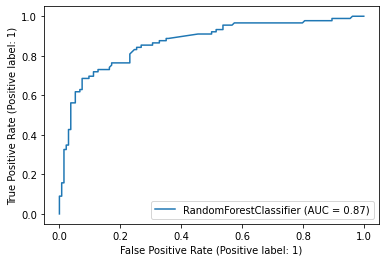

In [61]:
print('ROC plot for Mod1')
plot_roc_curve(rf1,X_test, y_test)

# Feature Importance

In [62]:
feature_label = pd.DataFrame(X_train).columns

# This is a very useful method!
feature_importance = rf1.feature_importances_

print(feature_label, feature_importance)

Index(['Age', 'Family', 'Q', 'S', 'Pclass_2', 'PClass_3', 'male'], dtype='object') [0.15801822 0.07887243 0.00844075 0.03325374 0.02708993 0.17075409
 0.52357084]


#### from the above feature importance score, it looks like we can remove feature ( Q : 0.008, S : 0.032, Pclass_2: 0.0254) 

In [63]:
rf1_x_train = X_train.drop(['Q'], axis=1)

In [64]:
rf1_x_train.drop(['S'],axis = 1, inplace=True)

In [65]:
rf1_x_train.head()

,Age,Family,Pclass_2,PClass_3,male
PassengerId,,,,,
299,0.359135,0.0,0,0,1
885,0.308872,0.0,0,1,1
248,0.296306,0.2,1,0,0
479,0.271174,0.0,0,1,1
306,0.006283,0.3,0,0,1


In [66]:
rf2 = RandomForestClassifier(n_estimators=1000,min_samples_split= 30, min_samples_leaf = 30).fit(rf1_x_train, y_train)

In [67]:
print('train_score_rf_1:',round(rf2.score(rf1_x_train, y_train)*100,2), '%')

train_score_rf_1: 81.14 %


In [68]:
X_test.head()

,Age,Family,Q,S,Pclass_2,PClass_3,male
PassengerId,,,,,,,
710,0.401454,0.333333,0,0,0,1,1
440,0.429956,0.000000,0,1,1,0,1
841,0.273194,0.000000,0,1,0,1,1
721,0.073678,0.166667,0,1,1,0,0
40,0.187687,0.166667,0,0,0,1,0


In [72]:
rf1_x_test = X_test.drop(['Q','S'], axis=1)

In [73]:
rf1_x_test.head()

,Age,Family,Pclass_2,PClass_3,male
PassengerId,,,,,
710,0.401454,0.333333,0,1,1
440,0.429956,0.000000,1,0,1
841,0.273194,0.000000,0,1,1
721,0.073678,0.166667,1,0,0
40,0.187687,0.166667,0,1,0


In [74]:
y_pred_rf2 = rf2.predict(rf1_x_test)
print('test_score_rf_1:',round(rf2.score(rf1_x_test, y_test)*100,2), '%')

test_score_rf_1: 81.61 %


In [75]:
# Accuracy Score
print('accuracy_score_rf2 =',round(accuracy_score(y_test, y_pred_rf2),2)*100, '%')

# Precision Score
print('precision_score_rf2 =', round(precision_score(y_test, y_pred_rf2),2)*100, '%')

# Recall
print('recall_score:rf2 =', round(recall_score(y_test, y_pred_rf2),2)*100, '%')

#F1 Score
print('f1_score_rf2 =', round(f1_score(y_test, y_pred_rf2),2)*100, '%')

accuracy_score_rf2 = 82.0 %
precision_score_rf2 = 86.0 %
recall_score:rf2 = 64.0 %
f1_score_rf2 = 74.0 %


ROC plot for Mod1


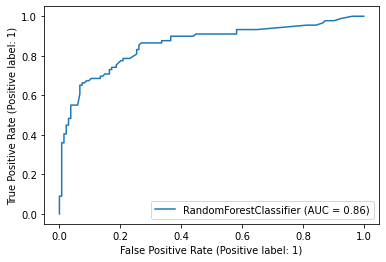

In [76]:
print('ROC plot for Mod1')
plot_roc_curve(rf2,rf1_x_test, y_test)

# Cross Validation


# __


#### For 1st rf1 model

In [77]:
s = StratifiedShuffleSplit(n_splits=5,test_size=.20,random_state=1)

cross_validation_rf1 = cross_val_score(estimator=rf1, # the model to evaluate
                                     X=X_train,
                                     y=y_train,
                                     scoring='accuracy', # evaluation metrics
                                      cv=s, # cross validation splitting
                                     verbose=3) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.799) total time=   0.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] END ................................ score: (test=0.821) total time=   0.7s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] END ................................ score: (test=0.821) total time=   0.7s
[CV] END ................................ score: (test=0.813) total time=   0.7s
[CV] END ................................ score: (test=0.791) total time=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.0s finished


In [78]:
print(f'Validation accuracy scores: {np.round(cross_validation_rf1,2)}')
print(f'\nmean: {cross_validation_rf1.mean():.2}')
print(f'std: {cross_validation_rf1.std():.1}')

Validation accuracy scores: [0.8  0.82 0.82 0.81 0.79]

mean: 0.81
std: 0.01


#### for rf2 model

In [79]:
s = StratifiedShuffleSplit(n_splits=5,test_size=.20,random_state=1)

cross_validation_rf2 = cross_val_score(estimator=rf2, # the model to evaluate
                                     X=X_train,
                                     y=y_train,
                                     scoring='accuracy', # evaluation metrics
                                      cv=s, # cross validation splitting
                                     verbose=3) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END ................................ score: (test=0.769) total time=   0.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] END ................................ score: (test=0.813) total time=   0.7s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] END ................................ score: (test=0.791) total time=   0.7s
[CV] END ................................ score: (test=0.806) total time=   0.7s
[CV] END ................................ score: (test=0.791) total time=   0.7s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.9s finished


In [80]:
print(f'Validation accuracy scores: {np.round(cross_validation_rf2,2)}')
print(f'\nmean: {cross_validation_rf2.mean():.2}')
print(f'std: {cross_validation_rf2.std():.1}')

Validation accuracy scores: [0.77 0.81 0.79 0.81 0.79]

mean: 0.79
std: 0.02
